### Convert the float-type columns to int-type and parsing the date from string to datetime format

In [245]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# Loading the data
data= pd.read_csv('Raw_Data.csv')
data['S_Number']=data['S_Number'].astype('int')
data['Min Price (Rs./Quintal)']=data['Min Price (Rs./Quintal)'].astype('int')
data['Max Price (Rs./Quintal)']=data['Max Price (Rs./Quintal)'].astype('int')
data['Modal Price (Rs./Quintal)']=data['Modal Price (Rs./Quintal)'].astype('int')


In [246]:

def date_parse(date):
    newdate=datetime.strptime(date, '%d %b %Y').strftime('%d-%m-%Y')
    return newdate
data['Price Date']=data.apply(lambda x :date_parse(x['Price Date']),axis=1)
data['Price Date']=pd.to_datetime(data['Price Date'])

In [247]:
data

S_Number District Name Market Name Commodity Variety Grade  \
0            1          Agra     Achnera    Potato    Desi   FAQ   
1            2          Agra     Achnera    Potato    Desi   FAQ   
2            3          Agra     Achnera    Potato    Desi   FAQ   
3            4          Agra     Achnera    Potato    Desi   FAQ   
4            5          Agra     Achnera    Potato    Desi   FAQ   
...        ...           ...         ...       ...     ...   ...   
1822      1823          Agra    Samsabad    Potato   Local   FAQ   
1823      1824          Agra    Samsabad    Potato   Local   FAQ   
1824      1825          Agra    Samsabad    Potato   Local   FAQ   
1825      1826          Agra    Samsabad    Potato   Local   FAQ   
1826      1827          Agra    Samsabad    Potato   Local   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                         900                     1000   
1                         800                      900   
2                         850                      950   
3                         800                      900   
4                         800                      900   
...                       ...                      ...   
1822                     1000                     1200   
1823                     1000                     1200   
1824                     1100                     1300   
1825                     1100                     1300   
1826                     1100                     1300   

      Modal Price (Rs./Quintal) Price Date  
0                           950 2020-12-30  
1                           850 2020-12-29  
2                           900 2020-12-28  
3                           850 2020-12-27  
4                           850 2020-12-26  
...                         ...        ...  
1822                       1100 2020-06-01  
1823                       1100 2020-05-01  
1824                       1200 2020-04-01  
1825                       1200 2020-02-01  
1826                       1200 2020-01-01  

[1827 rows x 10 columns]

In [248]:
data.to_csv('Price_Data.csv',index=False)


## Visualizations

### Visualizing the count of each market

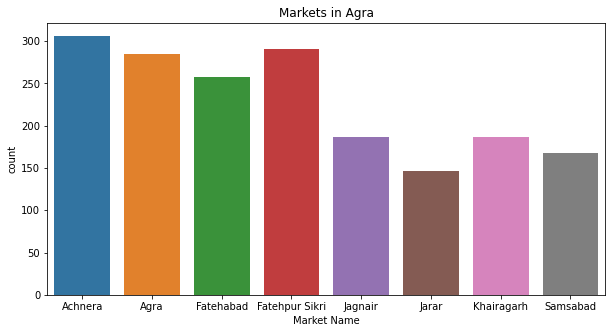

In [109]:

plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Market Name')
plt.title('Markets in Agra')
plt.show()

In [105]:
data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64

### Visualizing Price Patterns

In [141]:
market_data=data.loc[(data['Market Name']=='Achnera') | (data['Market Name']=='Fatehpur Sikri')  | (data['Market Name']=='Agra')| (data['Market Name']=='Fatehabad') ]
market_data

S_Number District Name     Market Name Commodity Variety Grade  \
0            1          Agra         Achnera    Potato    Desi   FAQ   
1            2          Agra         Achnera    Potato    Desi   FAQ   
2            3          Agra         Achnera    Potato    Desi   FAQ   
3            4          Agra         Achnera    Potato    Desi   FAQ   
4            5          Agra         Achnera    Potato    Desi   FAQ   
...        ...           ...             ...       ...     ...   ...   
1134      1135          Agra  Fatehpur Sikri    Potato   Local   FAQ   
1135      1136          Agra  Fatehpur Sikri    Potato   Local   FAQ   
1136      1137          Agra  Fatehpur Sikri    Potato   Local   FAQ   
1137      1138          Agra  Fatehpur Sikri    Potato   Local   FAQ   
1138      1139          Agra  Fatehpur Sikri    Potato   Local   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                         900                     1000   
1                         800                      900   
2                         850                      950   
3                         800                      900   
4                         800                      900   
...                       ...                      ...   
1134                     1260                     1420   
1135                     1300                     1500   
1136                     1370                     1500   
1137                     1360                     1500   
1138                     1400                     1520   

      Modal Price (Rs./Quintal) Price Date  
0                           950 2020-12-30  
1                           850 2020-12-29  
2                           900 2020-12-28  
3                           850 2020-12-27  
4                           850 2020-12-26  
...                         ...        ...  
1134                       1340 2020-07-01  
1135                       1385 2020-06-01  
1136                       1435 2020-03-01  
1137                       1420 2020-02-01  
1138                       1455 2020-01-01  

[1139 rows x 10 columns]

In [116]:
market_data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Name: Market Name, dtype: int64

### Visualization of Min Max and Modal Prices of the 4 main markets 

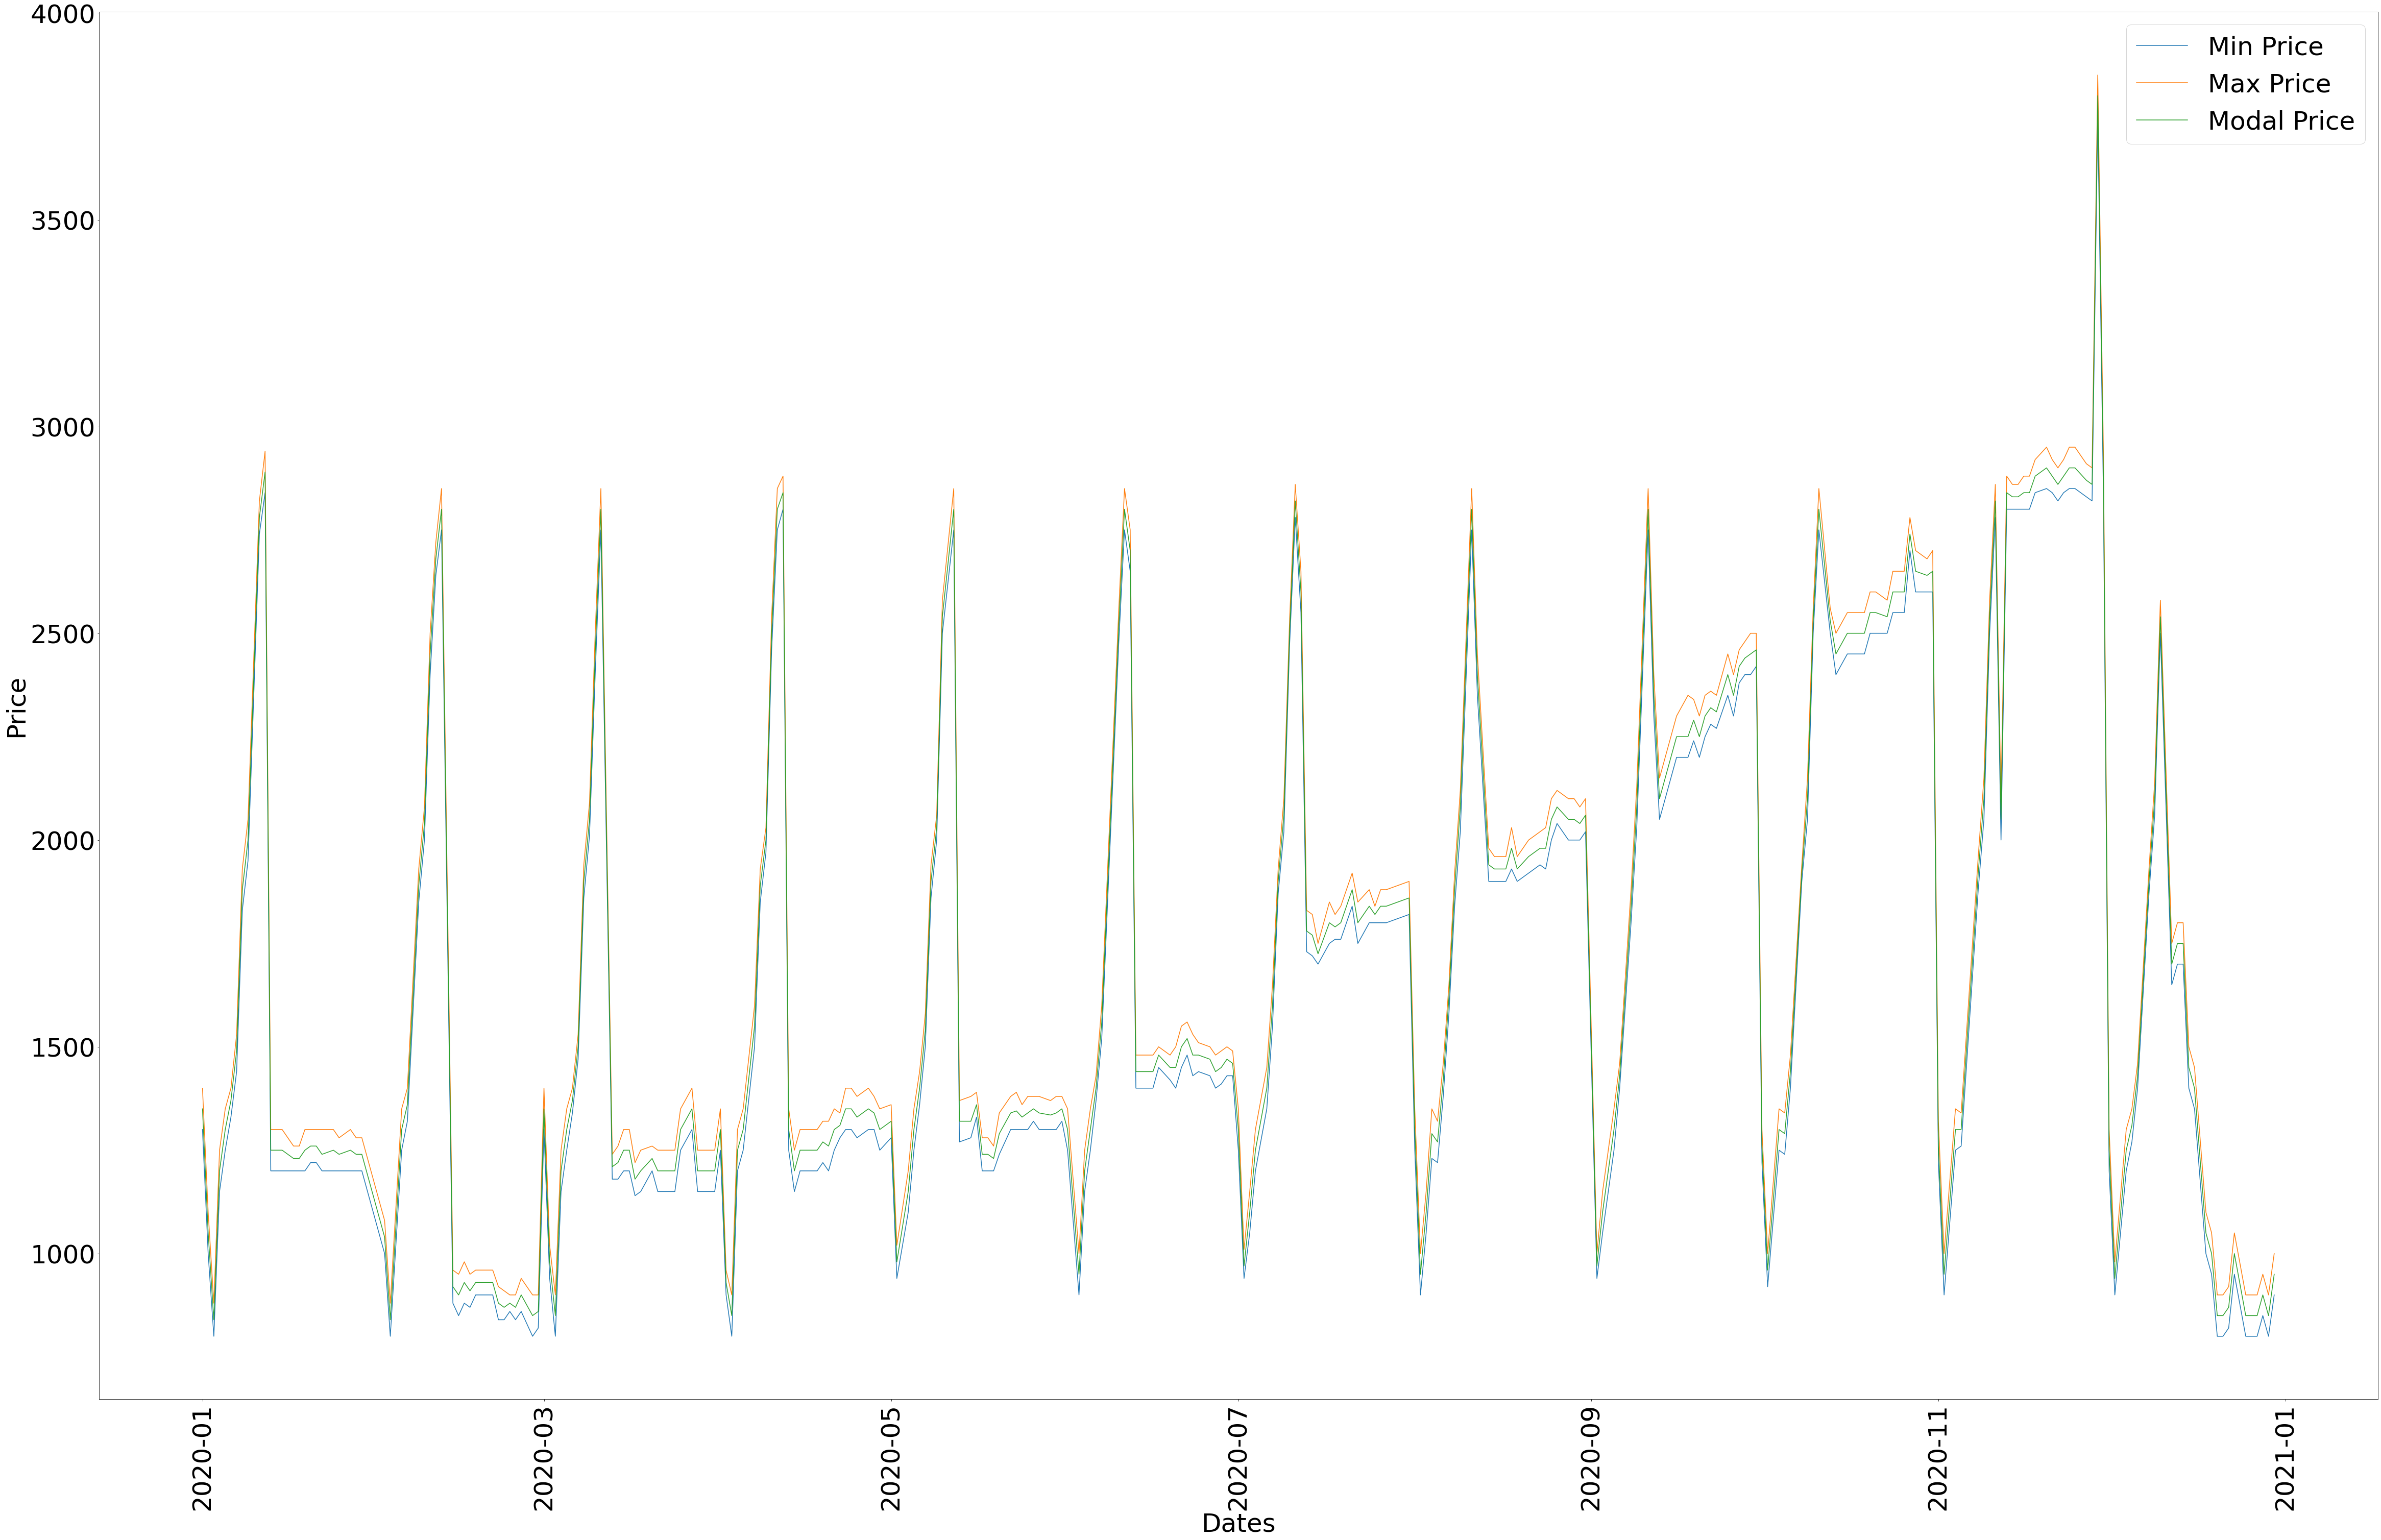

In [219]:


def figure1(marketname):
   
    
    plt.figure(figsize=(80,50))
    sns.lineplot(x='Price Date',y='Min Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,label='Min Price',markers=True)
    sns.lineplot(x='Price Date',y='Max Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,label='Max Price',markers=True)
    sns.lineplot(x='Price Date',y='Modal Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,label='Modal Price',markers=True)
    
    plt.legend(prop={'size': 50})
    plt.xlabel('Dates',fontsize=50)
    plt.ylabel('Price',fontsize=50)
    plt.xticks(rotation=90,fontsize=50)
    plt.yticks(fontsize=50)
    plt.show()
figure1('Achnera')

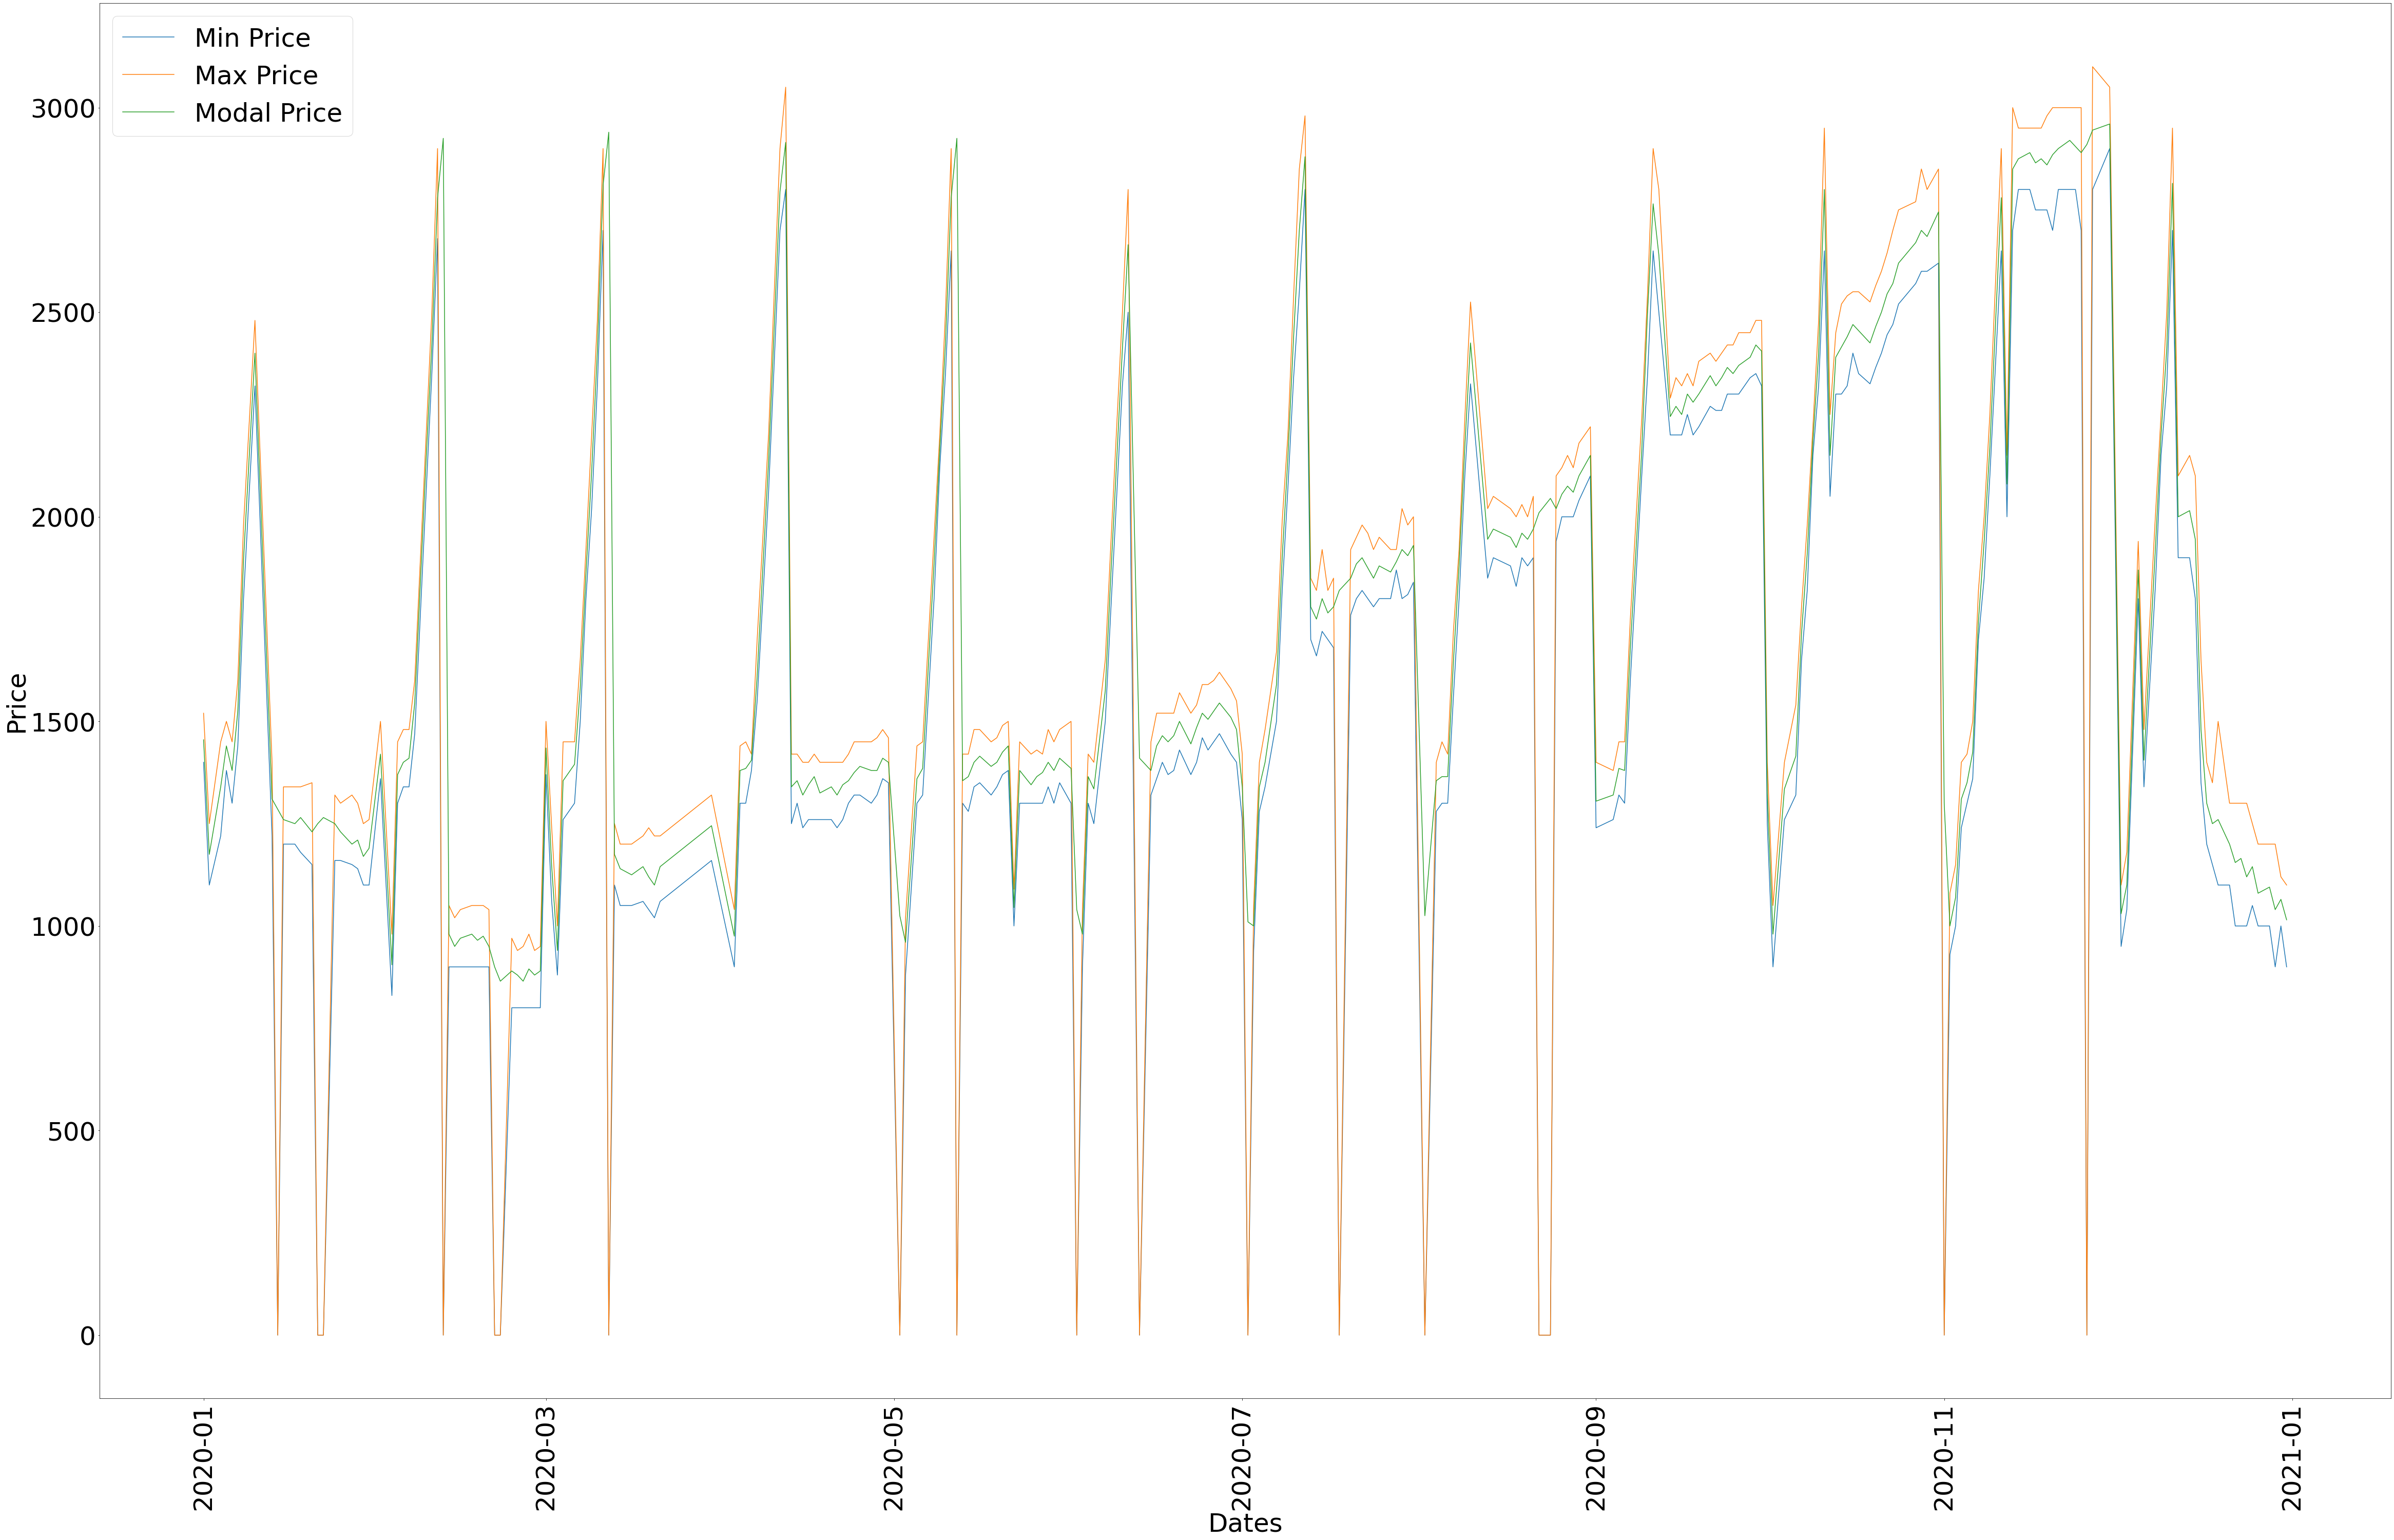

In [220]:
figure1('Fatehpur Sikri')

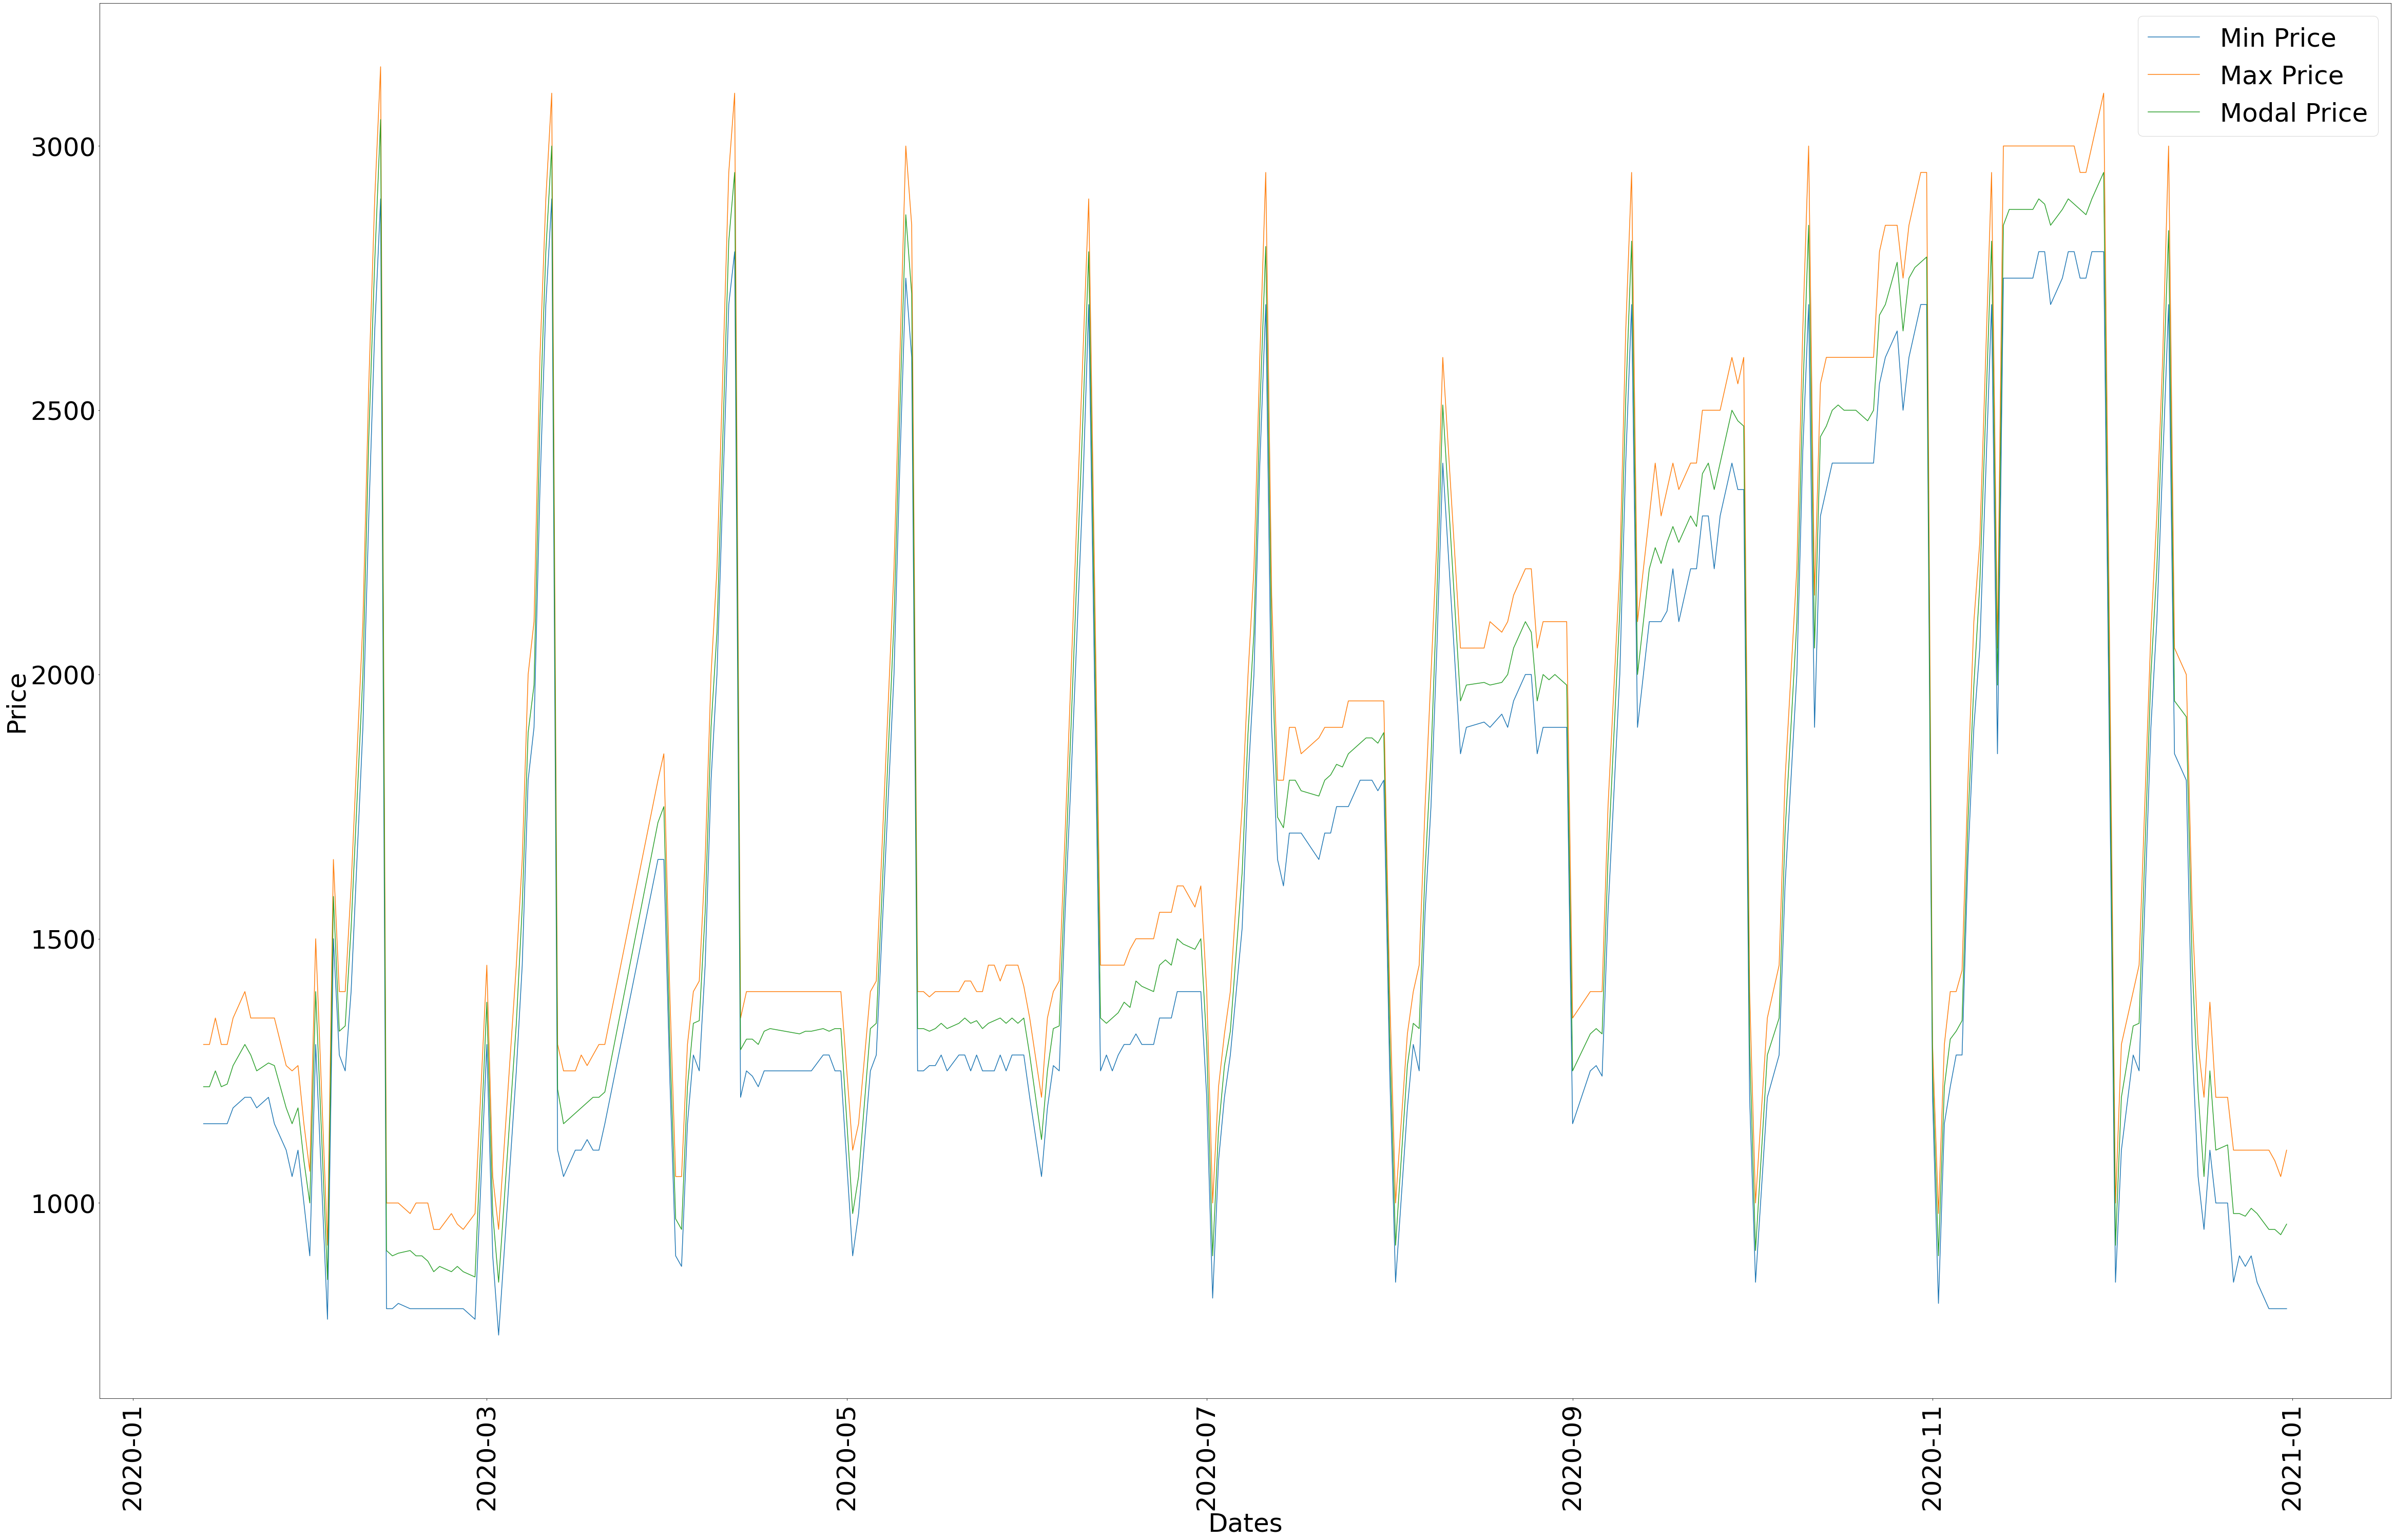

In [221]:
figure1('Agra')

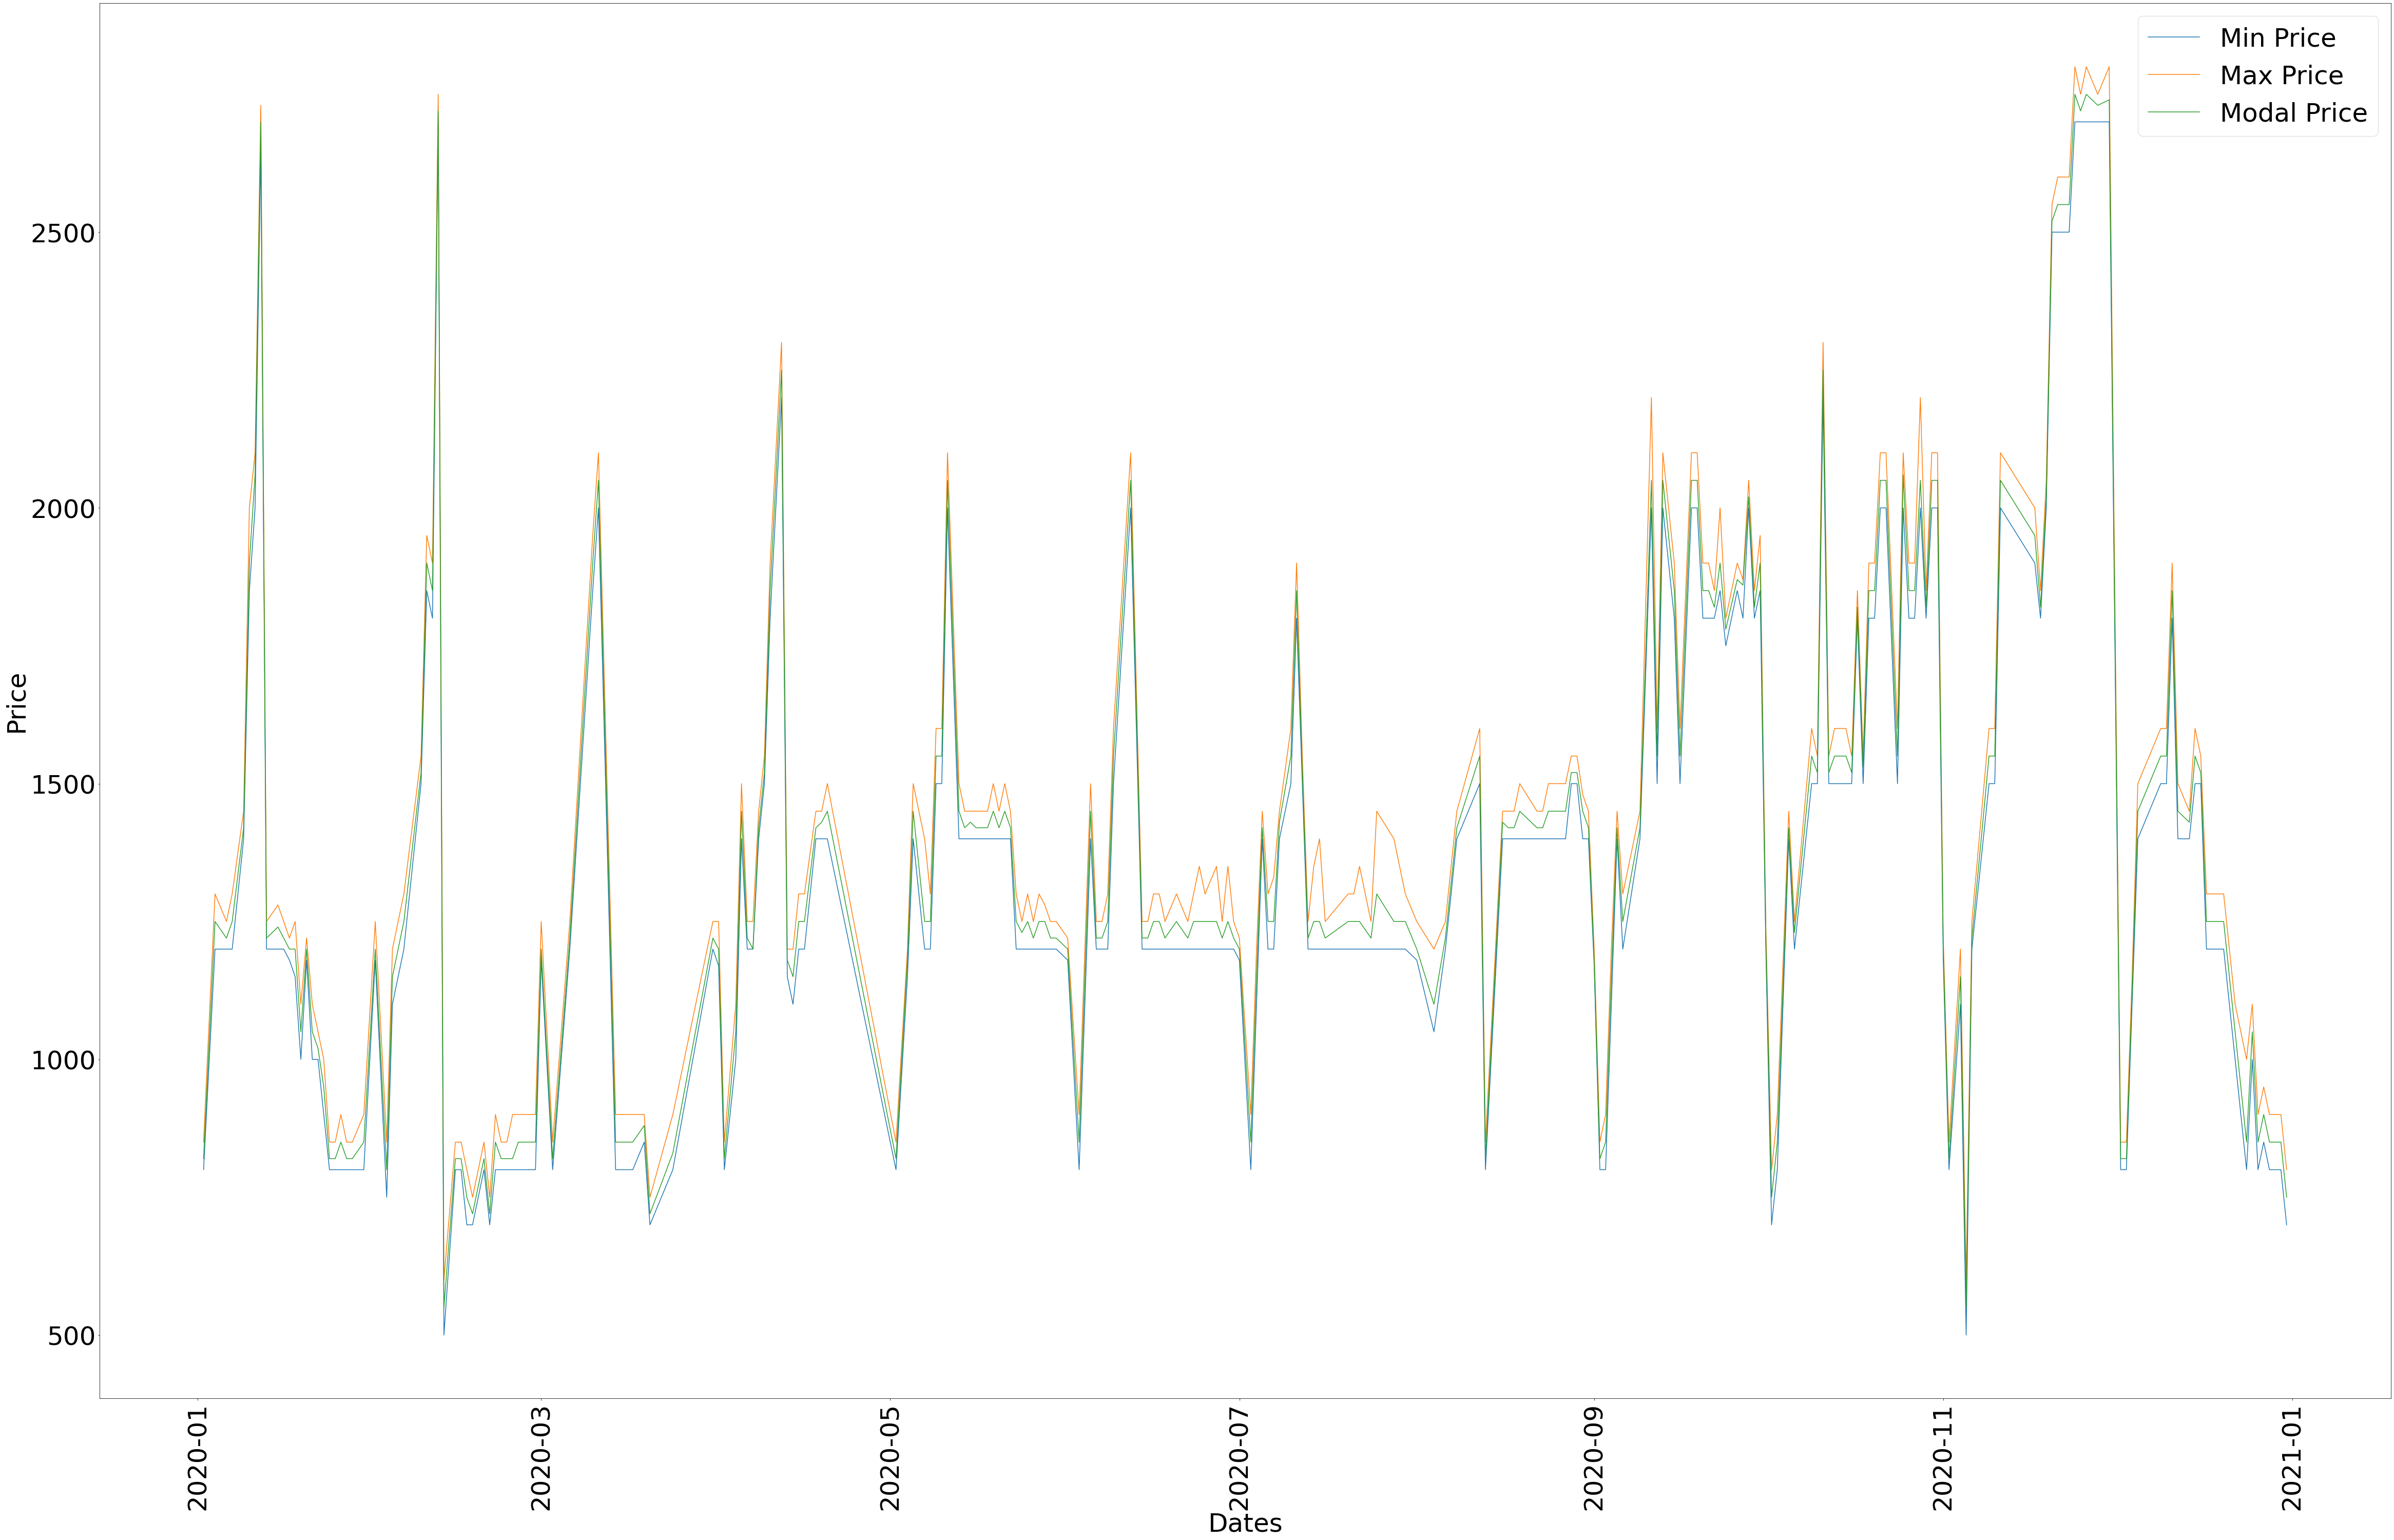

In [222]:
figure1('Fatehabad')

### VISUALIZATION OF MIN MAX AND MODAL PRICES OF THE 4 MAIN MARKETS BASED ON VARIETY

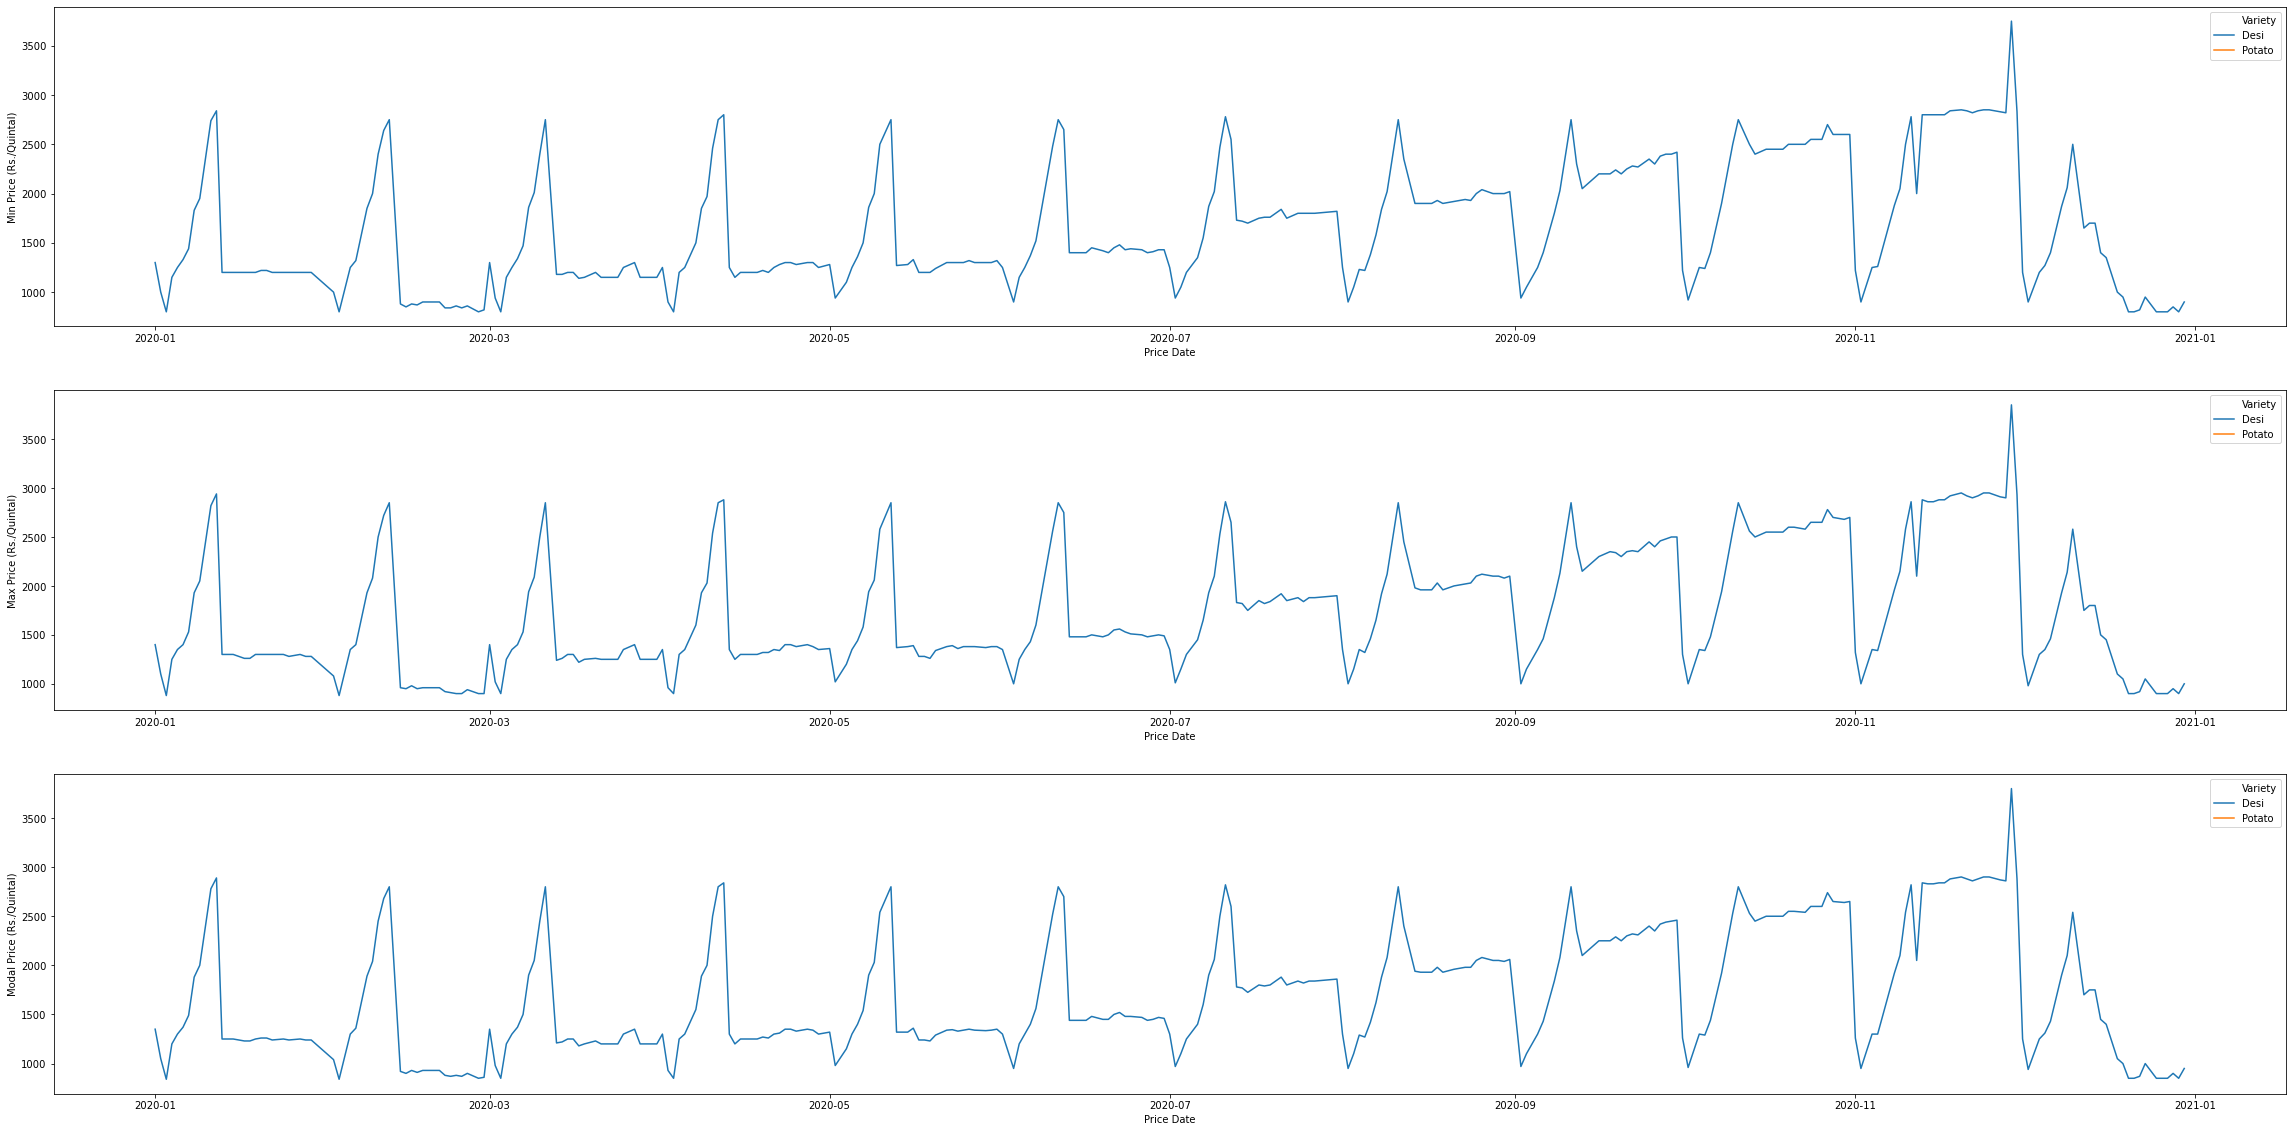

In [196]:
def figure2(marketname):
   
    
    figure, axes = plt.subplots(3, 1,figsize=(40,20))
    sns.lineplot(x='Price Date',y='Min Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,hue='Variety',ax=axes[0])
    
    
    sns.lineplot(x='Price Date',y='Max Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,hue='Variety',ax=axes[1])
    
    sns.lineplot(x='Price Date',y='Modal Price (Rs./Quintal)',data=market_data.loc[market_data['Market Name']==marketname] ,hue='Variety',ax=axes[2])
    
    plt.show()
figure2('Achnera')

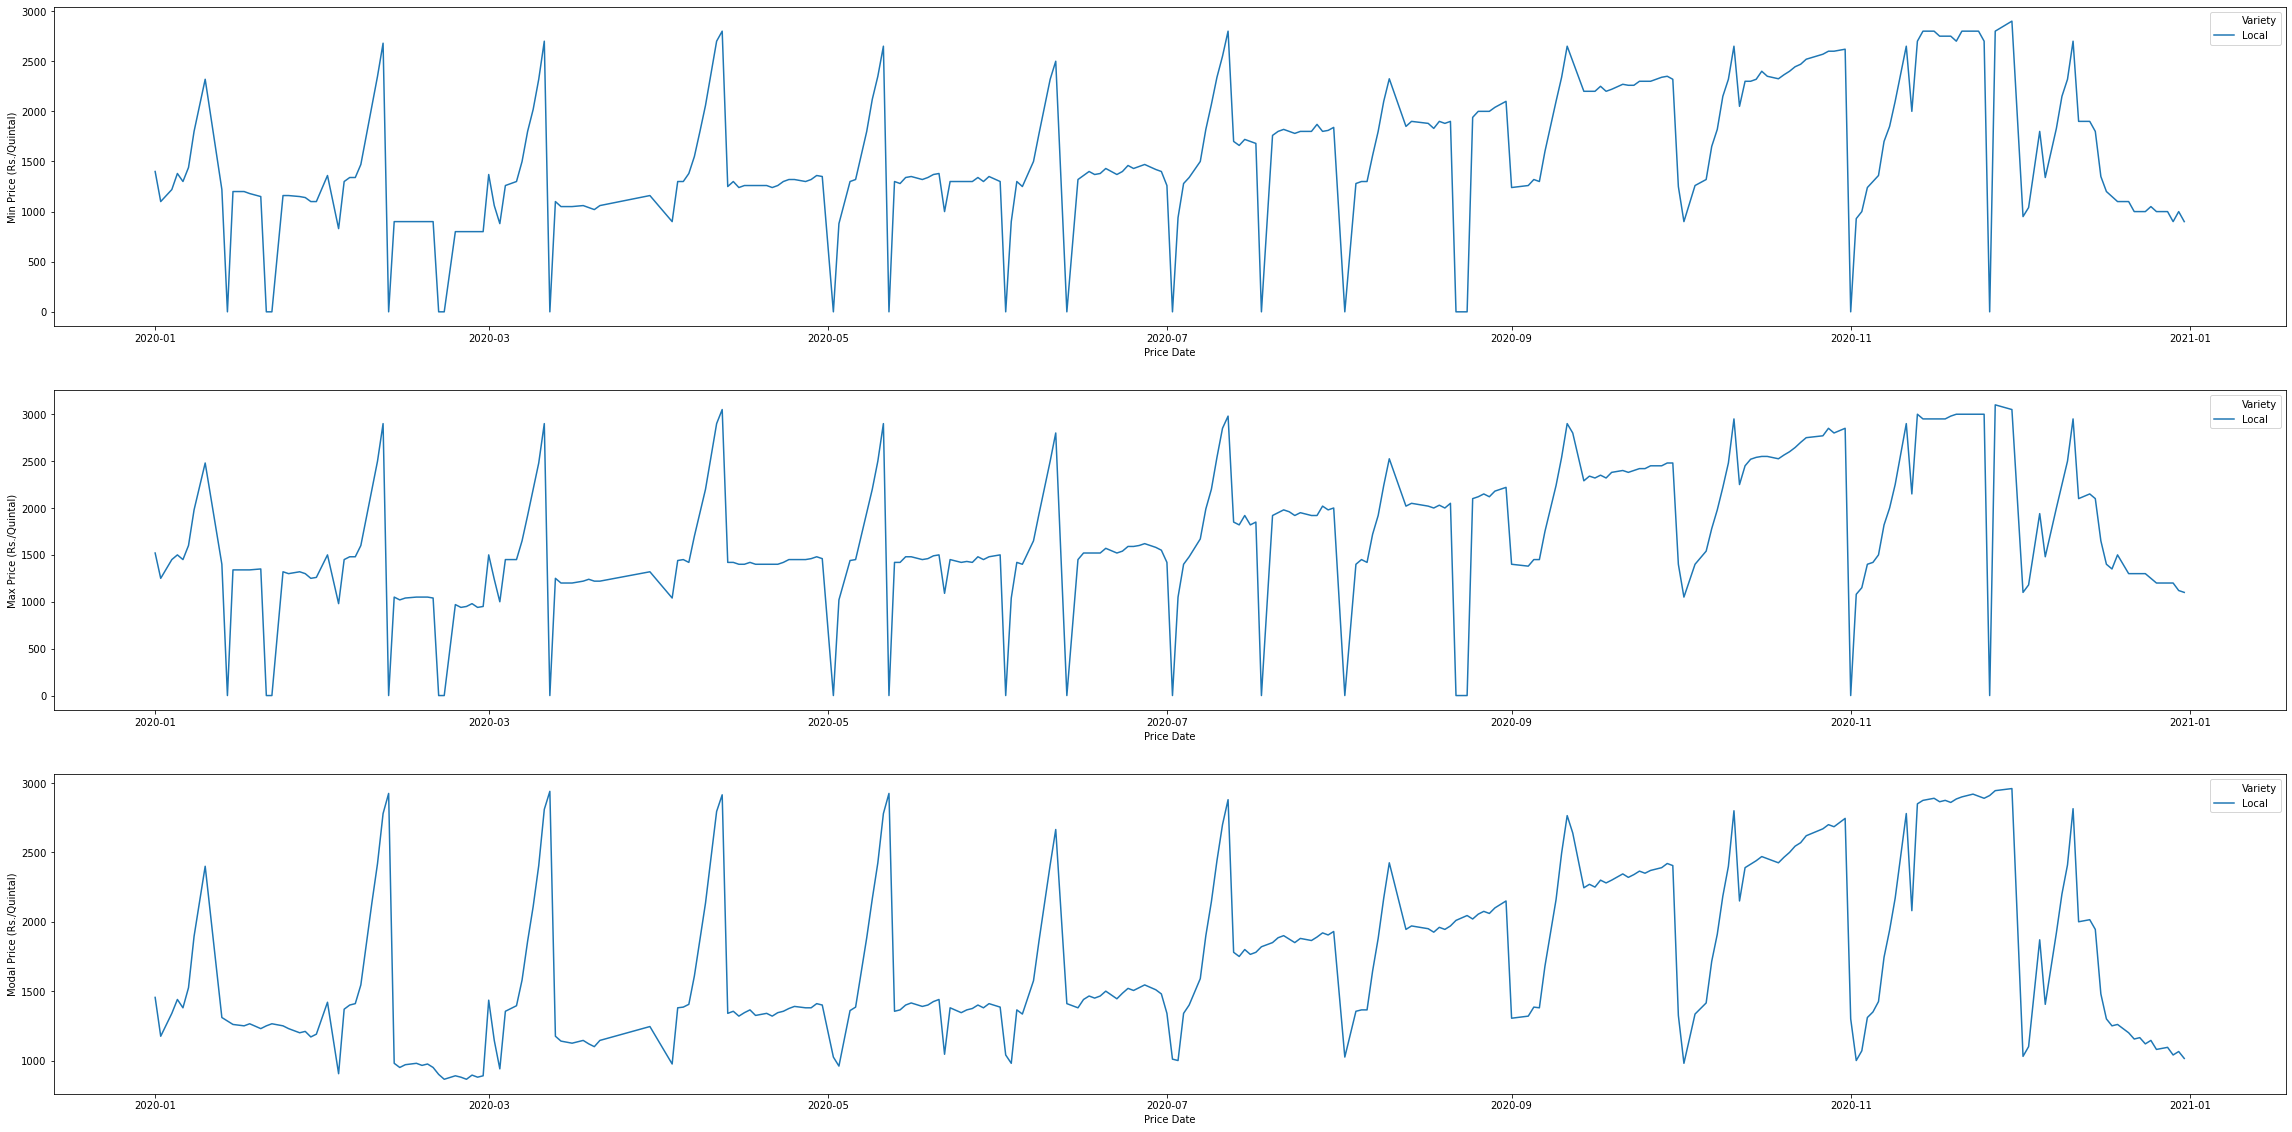

In [200]:
figure2('Fatehpur Sikri')

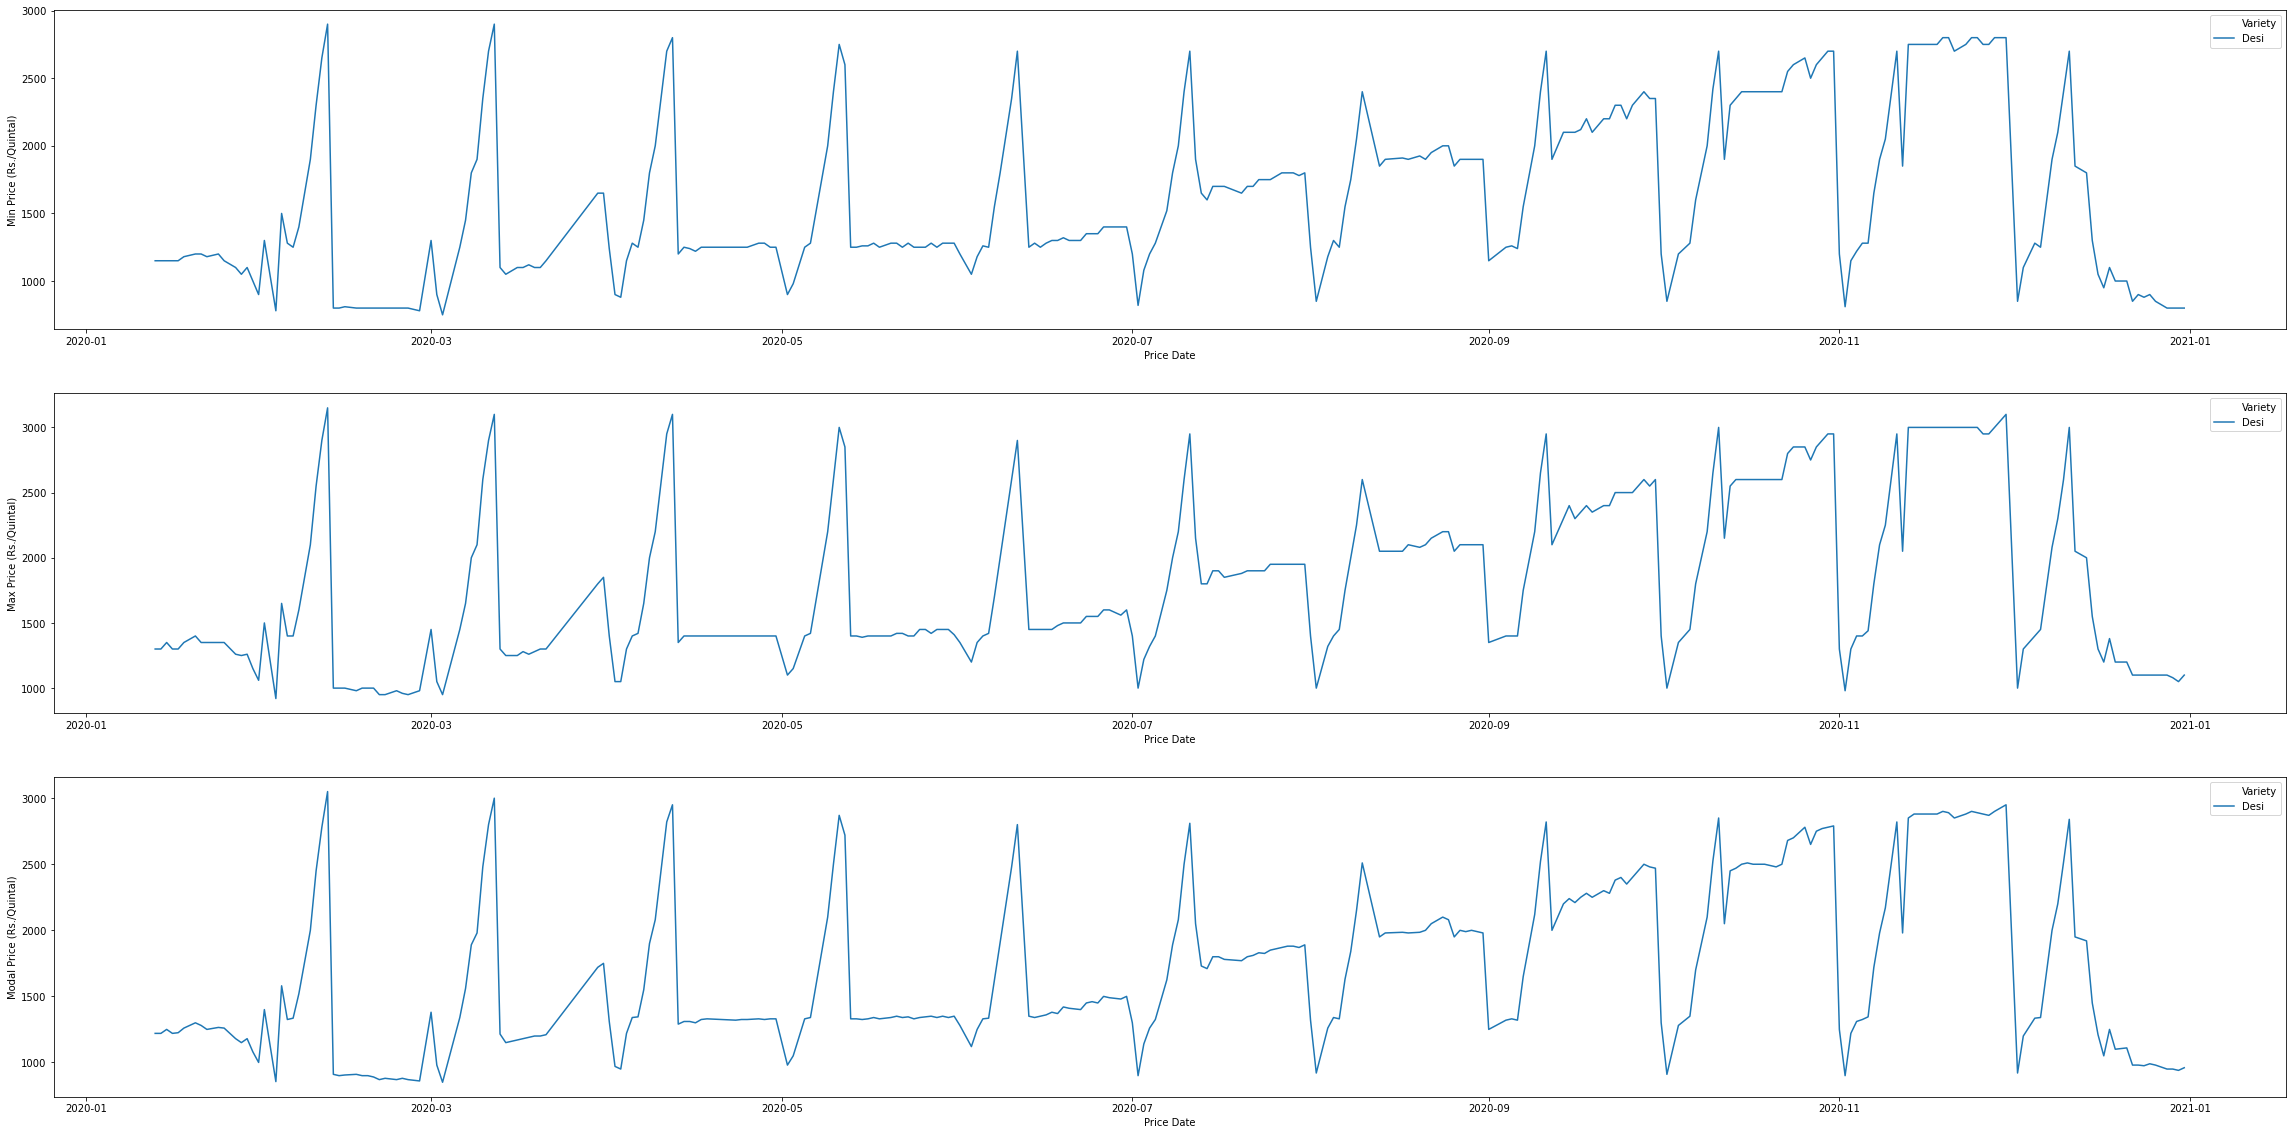

In [202]:
figure2('Agra')

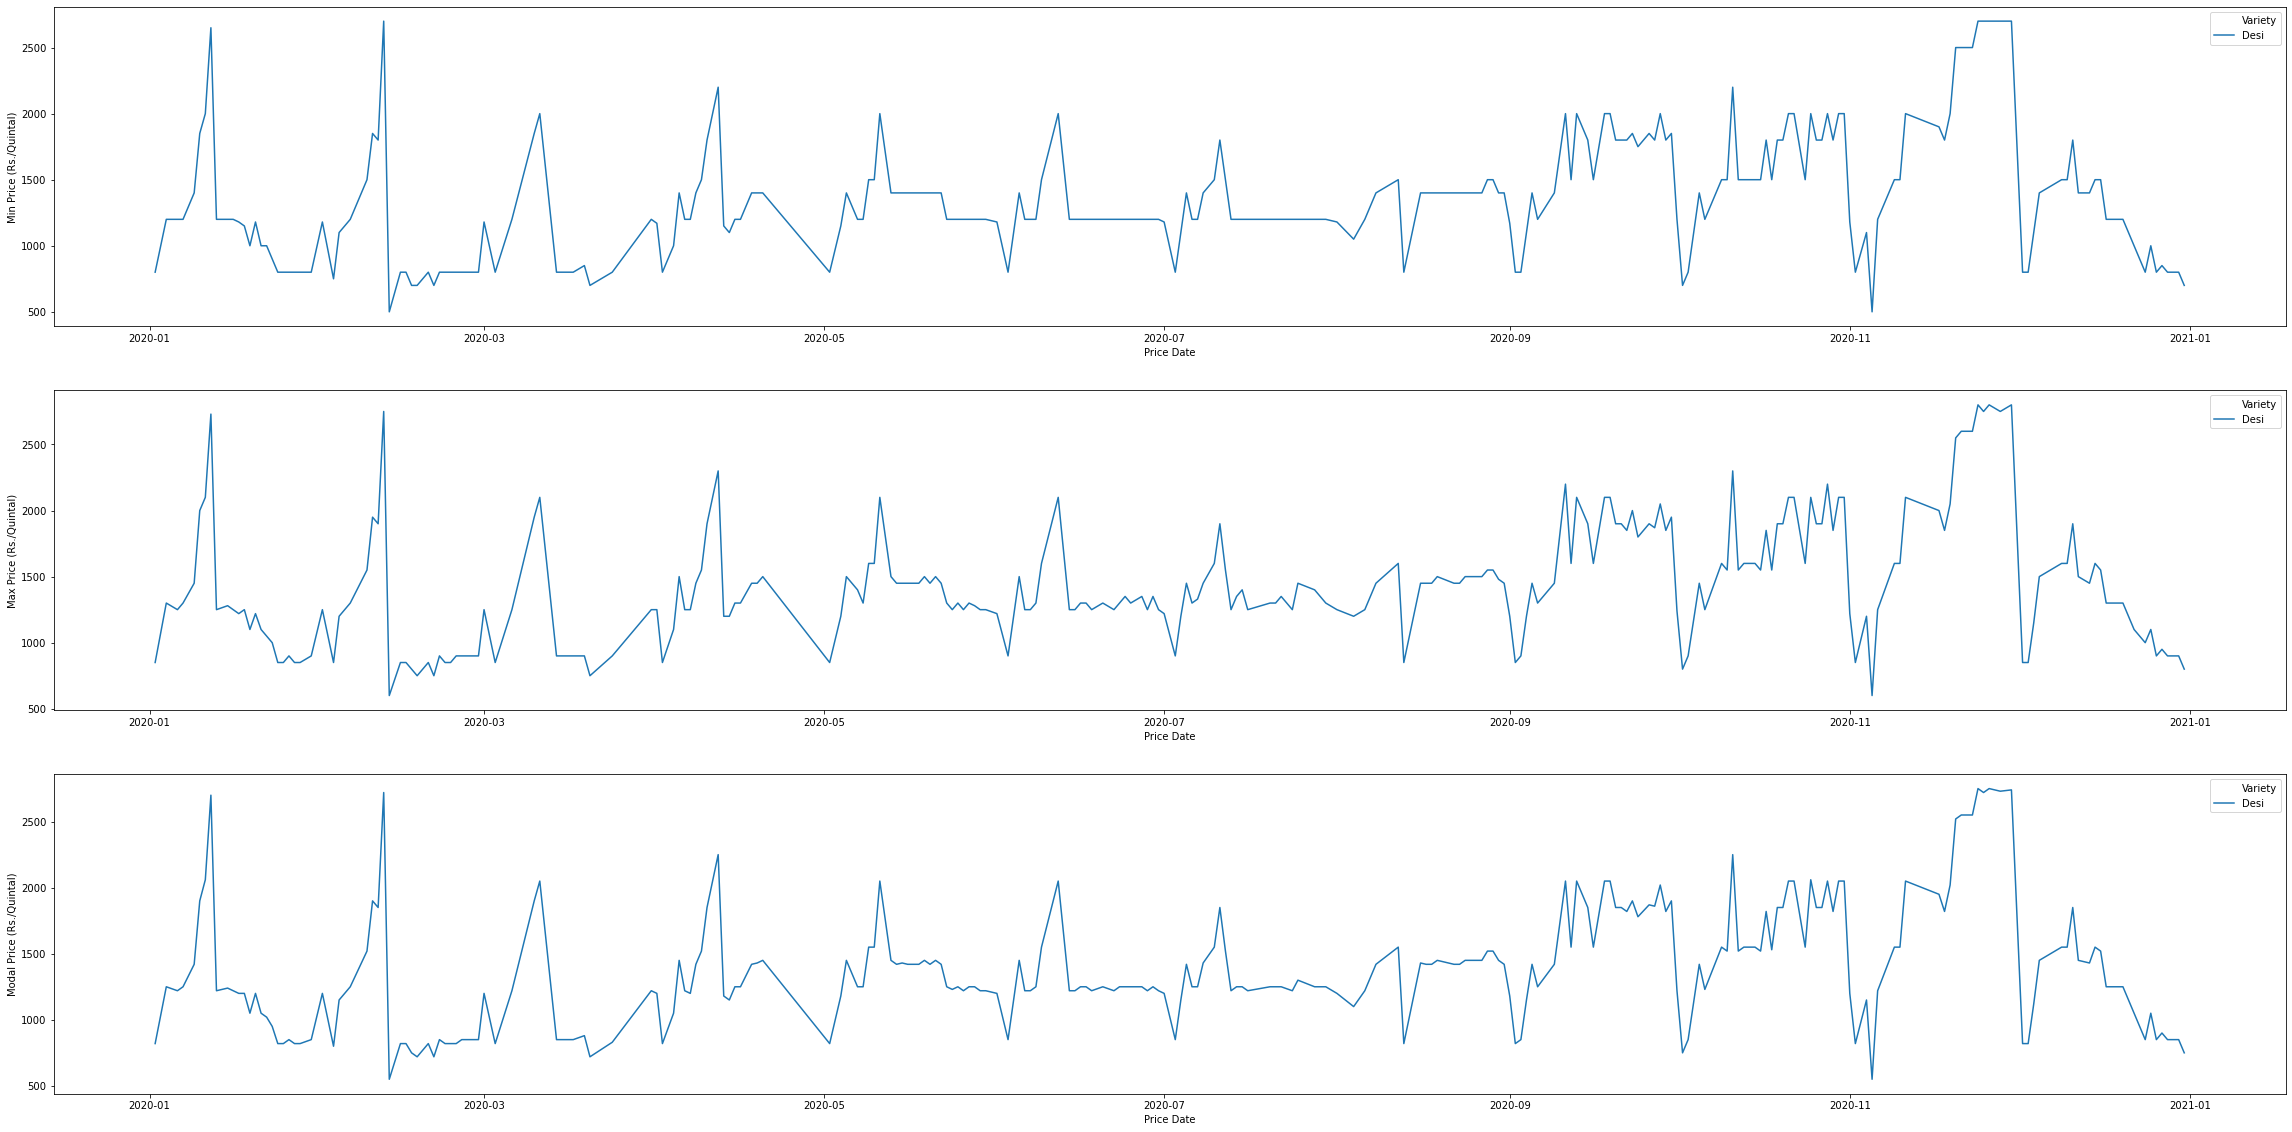

In [203]:
figure2('Fatehabad')

In [240]:
# Finding month and week no.
market_data['month']=pd.DatetimeIndex(market_data['Price Date']).month
def week_number_of_month(date_value):
     return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1)
market_data['week_no']=market_data.apply(lambda x: week_number_of_month(x['Price Date']),axis=1)
market_data['week_no']

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       5
1       5
2       5
3       4
4       4
       ..
1134    1
1135    1
1136    1
1137    1
1138    1
Name: week_no, Length: 1139, dtype: int64

### VISUALIZATION OF MONTHLY VARIATION OF PRICES 

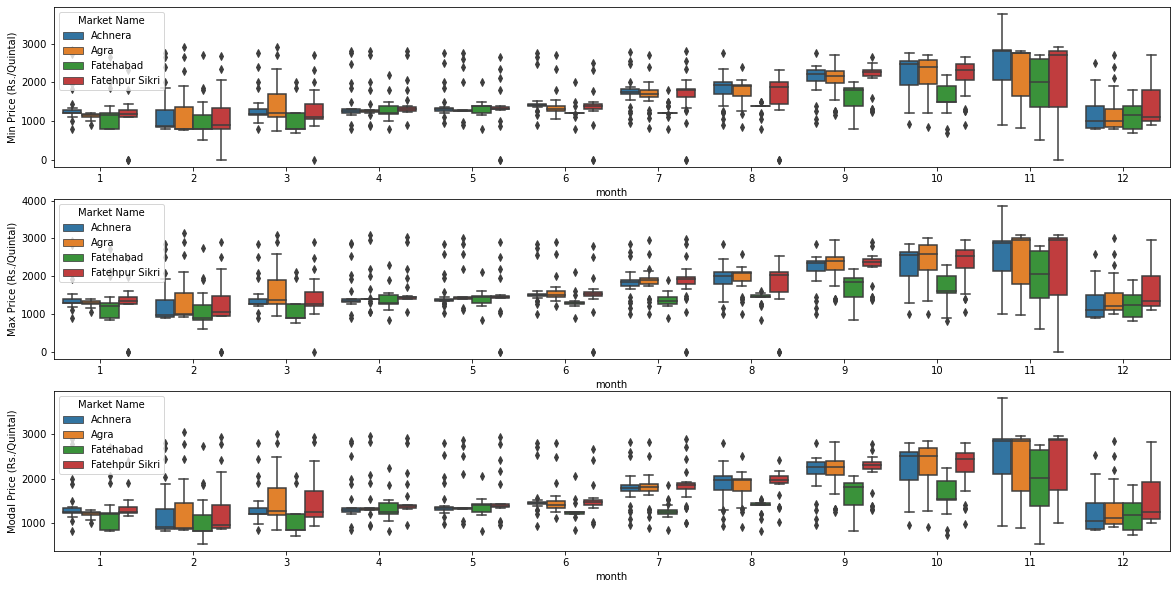

In [233]:
def figure4():
   
    
    figure, axes = plt.subplots(3, 1,figsize=(20,10))
    sns.boxplot(x='month',y='Min Price (Rs./Quintal)',data=market_data ,hue='Market Name',ax=axes[0])
    
    
    sns.boxplot(x='month',y='Max Price (Rs./Quintal)',data=market_data ,hue='Market Name',ax=axes[1])
    
    sns.boxplot(x='month',y='Modal Price (Rs./Quintal)',data=market_data,hue='Market Name',ax=axes[2])
    
    plt.show()
figure4()

### VISUALIZATION OF WEEKLY VARIATION OF PRICES FOR EACH MONTH 

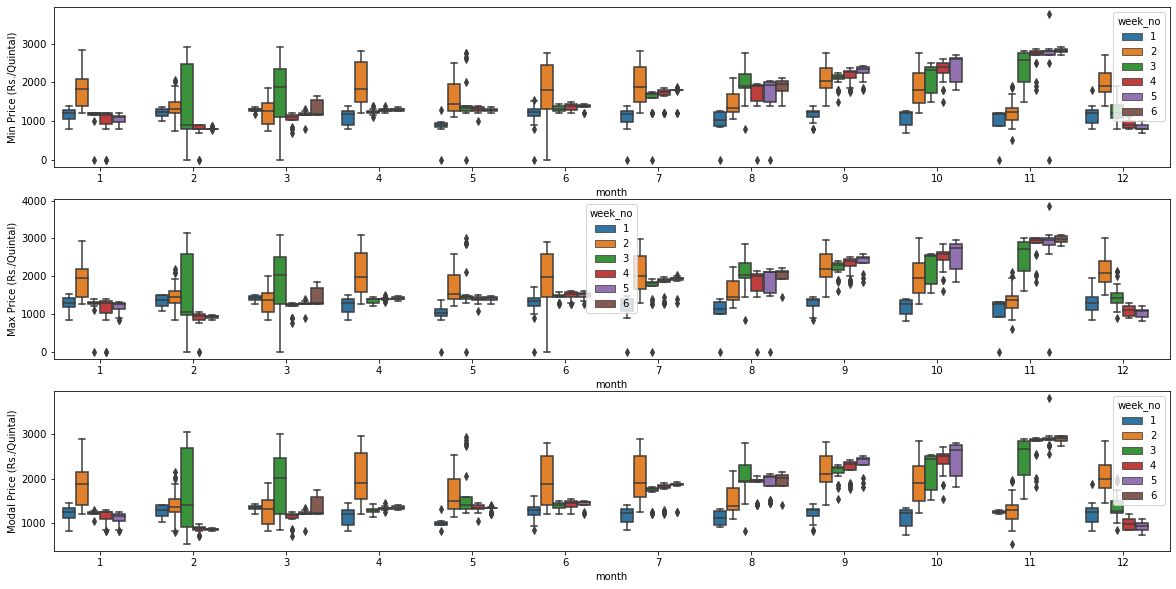

In [244]:
def figure5():
   
    
    figure, axes = plt.subplots(3, 1,figsize=(20,10))
    sns.boxplot(x='month',y='Min Price (Rs./Quintal)',data=market_data ,hue='week_no',ax=axes[0])
    
    
    sns.boxplot(x='month',y='Max Price (Rs./Quintal)',data=market_data ,hue='week_no',ax=axes[1])
    
    sns.boxplot(x='month',y='Modal Price (Rs./Quintal)',data=market_data,hue='week_no',ax=axes[2])
    
    plt.show()
figure5()